# IoT Anomaly Detection - Cluster Models

The purpose of this notebook is to create model per group of devices of the same type.

In [1]:
# imports
import sys
sys.path.append('../src')
from main import main
from ConfigConsts import *
from collections import OrderedDict

In [2]:
# Consts
CLUSTER_DIR = "@../args/cluster/"
CLUSTER_ARGS_FILE_PATH = CLUSTER_DIR + "{}_Cluster.txt"
CLUSTER_DELIMETER = "_"
DOORBELLS = DANMINI_DOORBELL + CLUSTER_DELIMETER + ENNIO_DOORBELL
PROV_SECURITY_CAM = PROV_737_SECURITY_CAM + CLUSTER_DELIMETER + PROV_838_SECURITY_CAM
SIMPLE_HOME_SECURITY_CAM = SIMPLE_HOME_1002_SECURITY_CAM + CLUSTER_DELIMETER + SIMPLE_HOME_1003_SECURITY_CAM
SECURITY_CAMS = SIMPLE_HOME_SECURITY_CAM + CLUSTER_DELIMETER + PROV_SECURITY_CAM
CLUSTER_ALL = "All"

CLUSTER_ARGS_FILES = [
    (DOORBELLS,                      [CLUSTER_ARGS_FILE_PATH.format(DOORBELLS)]),
    (PROV_SECURITY_CAM,              [CLUSTER_ARGS_FILE_PATH.format(PROV_SECURITY_CAM)]),
    (SIMPLE_HOME_SECURITY_CAM,       [CLUSTER_ARGS_FILE_PATH.format(SIMPLE_HOME_SECURITY_CAM)]),
    (SECURITY_CAMS,                  [CLUSTER_ARGS_FILE_PATH.format(SECURITY_CAMS)]),
    (CLUSTER_ALL,                    [CLUSTER_ARGS_FILE_PATH.format(CLUSTER_ALL)]),
]

Configuration:
name=Danmini_Doorbell_Ennio_Doorbell_Cluster
model=AutoEncoder
loss=MSE
optimizer=SGD
learning_rate=0.012
epochs=800
batch_size=32
iots=['Danmini_Doorbell', 'Ennio_Doorbell']
train_test_split=0.66
train_val_split=0.8
model_filename=Danmini_Doorbell_Ennio_Doorbell_Cluster
train=True
test=True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 86]           9,976
           Sigmoid-2                [-1, 1, 86]               0
            Linear-3                [-1, 1, 57]           4,959
           Sigmoid-4                [-1, 1, 57]               0
            Linear-5                [-1, 1, 38]           2,204
           Sigmoid-6                [-1, 1, 38]               0
            Linear-7                [-1, 1, 23]             897
           Sigmoid-8                [-1, 1, 23]               0
            Linear-9                [-1, 1, 38]    

model: <IoTAnomalyDetectorAutoEncoderNet.IoTAnomalyDetectorAutoEncoderNet object at 0x00000219138E99B0>
tr*:   0.05363556370139122
ws*:   1298

Configuration:
name=Simple_Home_1002_Security_Camera_Simple_Home_1003_Security_Camera_Provision_737_Security_Camera_Provision_838_Security_Camera_Cluster.txt
model=AutoEncoder
loss=MSE
optimizer=SGD
learning_rate=0.01
epochs=325
batch_size=32
iots=['Simple_Home_1002_Security_Camera', 'Simple_Home_1003_Security_Camera', 'Provision_737_Security_Camera', 'Provision_838_Security_Camera']
train_test_split=0.66
train_val_split=0.8
model_filename=Simple_Home_1002_Security_Camera_Simple_Home_1003_Security_Camera_Provision_737_Security_Camera_Provision_838_Security_Camera_Cluster
train=True
test=True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 86]           9,976
           Sigmoid-2                [-1, 1, 86]               0


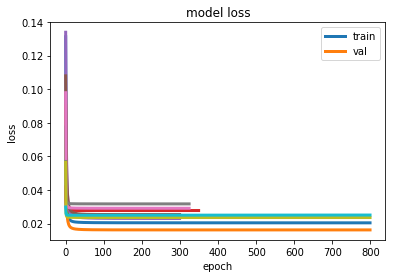

In [3]:
dfs_results = OrderedDict()
for iot, args in CLUSTER_ARGS_FILES:
    dfs_results[iot] = main(args)

In [4]:
for iot, results in dfs_results.items():
    display(results)

,Danmini_Doorbell,Ennio_Doorbell
benign_test,0.000000,0.002031
gafgyt_combo,0.998593,0.998416
gafgyt_junk,0.997110,0.997181
gafgyt_scan,0.997186,0.992931
gafgyt_tcp,0.999088,0.999163
gafgyt_udp,0.999197,0.999182
mirai_ack,0.999178,NaN
mirai_scan,0.999220,NaN
mirai_syn,0.999315,NaN
mirai_udp,0.999647,NaN


,Provision_737_Security_Camera,Provision_838_Security_Camera
benign_test,0.000000,0.001164
gafgyt_combo,0.998012,0.997827
gafgyt_junk,0.995793,0.995803
gafgyt_scan,0.995802,0.995528
gafgyt_tcp,0.000000,0.000000
gafgyt_udp,0.000000,0.000000
mirai_ack,0.997919,0.997827
mirai_scan,0.998760,0.998702
mirai_syn,0.998053,0.998060
mirai_udp,0.999245,0.999256


,Simple_Home_1002_Security_Camera,Simple_Home_1003_Security_Camera
benign_test,0.010291,0.000000
gafgyt_combo,0.988044,0.988956
gafgyt_junk,0.977046,0.976325
gafgyt_scan,0.976640,0.977250
gafgyt_tcp,0.992681,0.993383
gafgyt_udp,0.993723,0.993678
mirai_ack,0.994187,0.993954
mirai_scan,0.985892,0.985163
mirai_syn,0.994814,0.994644
mirai_udp,0.995733,0.995875


,Provision_737_Security_Camera,Provision_838_Security_Camera,Simple_Home_1002_Security_Camera,Simple_Home_1003_Security_Camera
benign_test,0.000000,0.000000,0.000379,0.000000
gafgyt_combo,0.987960,0.987102,0.986441,0.987356
gafgyt_junk,0.975824,0.974577,0.973862,0.973078
gafgyt_scan,0.974741,0.973800,0.973010,0.973261
gafgyt_tcp,0.000000,0.000000,0.000000,0.000000
gafgyt_udp,0.000000,0.000000,0.000000,0.000000
mirai_ack,0.987730,0.987189,0.993443,0.993180
mirai_scan,0.992385,0.992348,0.983693,0.983010
mirai_syn,0.988669,0.988084,0.994122,0.993917
mirai_udp,0.995245,0.995328,0.995128,0.995302


,Danmini_Doorbell,Ecobee_Thermostat,Ennio_Doorbell,Philips_Baby_Monitor,Provision_737_Security_Camera,Provision_838_Security_Camera,Samsung_Webcam,Simple_Home_1002_Security_Camera,Simple_Home_1003_Security_Camera
benign_test,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gafgyt_combo,0.971449,0.967837,0.967744,0.970491,0.972190,0.970276,0.970802,0.968609,0.971076
gafgyt_junk,0.940932,0.943620,0.942679,0.939433,0.944495,0.941276,0.939693,0.939991,0.937767
gafgyt_scan,0.942879,0.937986,0.856518,0.938799,0.941803,0.939958,0.938443,0.938724,0.940326
gafgyt_tcp,0.981496,0.982057,0.983208,0.981584,0.983686,0.980926,0.982563,0.980803,0.982615
gafgyt_udp,0.983877,0.983701,0.983566,0.983854,0.983579,0.983680,0.984559,0.983533,0.983414
mirai_ack,0.983355,0.984985,NaN,0.981333,0.971909,0.970671,NaN,0.984742,0.984131
mirai_scan,0.984204,0.960618,NaN,0.983584,0.982424,0.982481,NaN,0.962965,0.961052
mirai_syn,0.986065,0.985309,NaN,0.985482,0.974128,0.972498,NaN,0.986422,0.986014
mirai_udp,0.992843,0.988771,NaN,0.992163,0.989113,0.989275,NaN,0.988800,0.989171
